# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
import csv
import datetime
import time
from citipy import citipy
import random
from scipy.stats import linregress

# Google API Key
from api_keys import g_key

random.seed(333)

## Generate Cities List

In [2]:
# Setup the ranges for latitude and longitude
latitude_range = (-90,90)
longatude_range = (-180,180)

# Create variables for data
cities = []

no_cities = 2000
for cntr in range(no_cities):
    latitude = random.uniform(latitude_range[0],latitude_range[1])
    longitude = random.uniform(longatude_range[0],longatude_range[1])
    
    # If we have chosen a latitude of 0 then we don't want to use that
    # one
    if latitude != 0:
        city = citipy.nearest_city(latitude,longitude)
        city_name = city.city_name
        city_country = city.country_code
        if not any(c['name'] == city_name and c['country'] == city_country for c in cities):
            city_dict = {'name': city_name,'country': city_country}
            cities.append(city_dict)

In [3]:
print(cities)

[{'name': 'mana', 'country': 'gf'}, {'name': 'barrow', 'country': 'us'}, {'name': 'fort wellington', 'country': 'gy'}, {'name': 'te anau', 'country': 'nz'}, {'name': 'geraldton', 'country': 'au'}, {'name': 'fairbanks', 'country': 'us'}, {'name': 'punta arenas', 'country': 'cl'}, {'name': 'jamestown', 'country': 'sh'}, {'name': 'pevek', 'country': 'ru'}, {'name': 'tabiauea', 'country': 'ki'}, {'name': 'east london', 'country': 'za'}, {'name': 'mys shmidta', 'country': 'ru'}, {'name': 'qaanaaq', 'country': 'gl'}, {'name': 'hasaki', 'country': 'jp'}, {'name': 'vaini', 'country': 'to'}, {'name': 'mar del plata', 'country': 'ar'}, {'name': 'maraba', 'country': 'br'}, {'name': 'faanui', 'country': 'pf'}, {'name': 'rehoboth', 'country': 'na'}, {'name': 'bluff', 'country': 'nz'}, {'name': 'bogotol', 'country': 'ru'}, {'name': 'leningradskiy', 'country': 'ru'}, {'name': 'inongo', 'country': 'cd'}, {'name': 'taolanaro', 'country': 'mg'}, {'name': 'port elizabeth', 'country': 'za'}, {'name': 'cam

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city_id = []
city_name = []
city_cloudiness = []
city_country = []
city_date = []
city_humidity = []
city_latitude = []
city_longitude = []
city_temperature = []
city_wind_speed = []


# Build partial query URL
query_url = f"{base_url}appid={g_key}&units={units}&q="

city_cntr = -1
no_cities_to_retrieve = 40


# Loop through cities
for index, city in enumerate(cities):
    # See if we need to sleep so we don't go over our 60 a minute max for the api
    q, mod = divmod(index+1,55)
    if mod == 0:
        print("Pausing for a minute so we don't over the api calls per minute limit!")
        time.sleep(60)
    
    
    
    # Retrieve data information
    try:
        city_json = requests.get(query_url + city['name'] + ', ' + city['country']).json()
    except:
        print(f"City not found - {city['name']}, {city['country']} - skipping")

    if city_json['cod'] == 200:
        city_cntr += 1
        print(f"Retrieved data for {city_cntr}-{city_json['name']}, {city_json['sys']['country']} ({city_json['coord']['lat']},{city_json['coord']['lon']})")
        
        city_id.append(city_cntr)
        city_name.append(city_json['name'])
        city_cloudiness.append(city_json['clouds']['all'])
        city_country.append(city_json['sys']['country'])
        city_date.append(city_json['dt'])
        city_humidity.append(city_json['main']['humidity'])
        city_latitude.append(city_json['coord']['lat'])
        city_longitude.append(city_json['coord']['lon'])
        city_temperature.append(city_json['main']['temp_max'])              
        city_wind_speed.append(city_json['wind']['speed'])
    
    if city_cntr+1 == no_cities_to_retrieve:
        break
    
          

Retrieved data for 0-Mana, GF (5.66,-53.78)
Retrieved data for 1-Barrow, US (71.29,-156.79)
Retrieved data for 2-Catherinas Lust, GY (6.4,-57.6)
Retrieved data for 3-Te Anau, NZ (-45.42,167.72)
Retrieved data for 4-Geraldton, AU (-28.77,114.6)
Retrieved data for 5-Fairbanks, US (64.84,-147.72)
Retrieved data for 6-Punta Arenas, CL (-53.15,-70.92)
Retrieved data for 7-Jamestown, SH (-15.94,-5.72)
Retrieved data for 8-Pevek, RU (69.7,170.31)
Retrieved data for 9-East London, ZA (-33.02,27.91)
Retrieved data for 10-Qaanaaq, GL (77.48,-69.36)
Retrieved data for 11-Hasaki, JP (35.73,140.83)
Retrieved data for 12-Vaini, TO (-21.2,-175.2)
Retrieved data for 13-Mar del Plata, AR (-38,-57.56)
Retrieved data for 14-Marabá, BR (-5.37,-49.12)
Retrieved data for 15-Faanui, PF (-16.48,-151.75)
Retrieved data for 16-Rehoboth, NA (-23.32,17.08)
Retrieved data for 17-Bluff, NZ (-46.6,168.33)
Retrieved data for 18-Bogotol, RU (56.21,89.53)
Retrieved data for 19-Leningradskiy, RU (69.38,178.42)
Retrieved

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a DataFrame with the following columns:
# City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
city_data = {
             "City ID": city_id,
             "City": city_name,
             "Cloudiness": city_cloudiness,
             "Country": city_country,    
             "Date": city_date,
             "Humidity": city_humidity,
             "Lat": city_latitude,
             "Lng": city_longitude,
             "Max Temp": city_temperature,
             "Wind Speed": city_wind_speed
            }

city_df = pd.DataFrame(city_data)
city_df.set_index('City ID', inplace = True)

# Write the cities.csv file
csv_file_name = "../output_data/cities.csv"

city_df.to_csv(csv_file_name)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Get rid of any cities that have a humitidy greater than 100
cleaned_city_df = city_df[city_df['Humidity'] <= 100]

# Preview the cleaned data
cleaned_city_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Mana,53,GF,1603044805,62,5.66,-53.78,87.40,9.80
1,Barrow,1,US,1603044625,79,71.29,-156.79,21.20,16.11
2,Catherinas Lust,72,GY,1603044805,62,6.40,-57.60,87.08,8.41
3,Te Anau,100,NZ,1603044562,92,-45.42,167.72,43.75,1.28
4,Geraldton,1,AU,1603044711,87,-28.77,114.60,60.80,4.70
5,Fairbanks,75,US,1603044637,78,64.84,-147.72,16.00,4.70
6,Punta Arenas,75,CL,1603044454,65,-53.15,-70.92,48.00,24.16
7,Jamestown,100,SH,1603044626,95,-15.94,-5.72,61.39,15.77
8,Pevek,30,RU,1603044805,94,69.70,170.31,23.54,16.64


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [7]:
# Create a variable to store today's date
today = datetime.datetime.now().strftime('%m/%d/%Y')

In [8]:
def city_plot(df,compare_what,plot_label,y_label):
    # Setup the x and y axis
    x_axis = df['Lat']
    y_axis = df[compare_what]

    # Create the scatter plot
    plt.scatter(x_axis, y_axis)

    # Setup the title and labels
    plt.title(f'City Latitude vs. {plot_label} ({today})', fontsize=12)
    plt.xlabel('Latitude', fontsize=12)
    plt.ylabel(f'{y_label}', fontsize=12)
    plt.grid(True)

    # Show the scatter plot
    plt.show()    

## Latitude vs. Temperature Plot

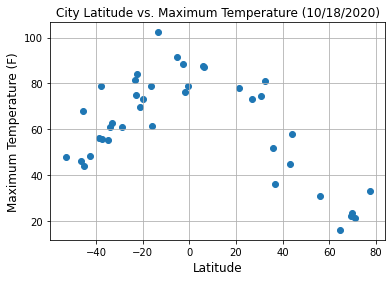

In [9]:
city_plot(cleaned_city_df,'Max Temp','Maximum Temperature','Maximum Temperature (F)')

## Latitude vs. Humidity Plot

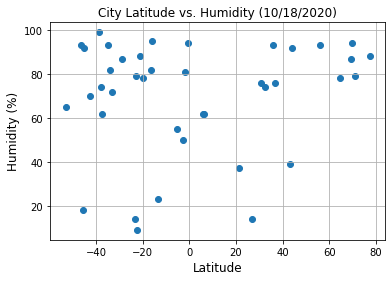

In [10]:
city_plot(cleaned_city_df,'Humidity','Humidity','Humidity (%)')

## Latitude vs. Cloudiness Plot

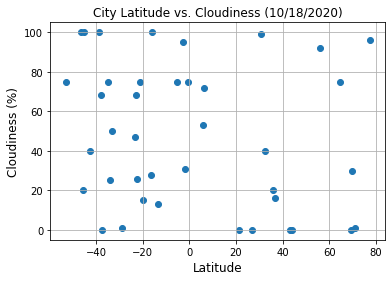

In [11]:
city_plot(cleaned_city_df,'Cloudiness','Cloudiness','Cloudiness (%)')

## Latitude vs. Wind Speed Plot

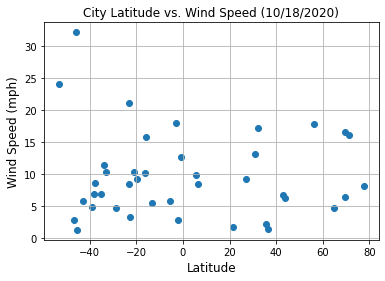

In [12]:
city_plot(cleaned_city_df,'Wind Speed','Wind Speed','Wind Speed (mph)')

## Linear Regression

In [13]:
def linear_regress(df,compare_what,hemisphere,plot_label,y_label):
    
    # Restrict to our requested hemisphere
    if hemisphere == 'Southern':
        hemisphere_df = df.loc[df['Lat'] < 0]
    else:
        hemisphere_df = df.loc[df['Lat'] > 0]
    
    # Set the x and y axis
    x_axis = hemisphere_df['Lat']
    y_axis =hemisphere_df[compare_what]

    # Perform the linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

    # Output the R value
    print(f"The R-Value between Latitude and {compare_what} is {round(rvalue,2)} for the {hemisphere} Hemisphere")

    # Get the regress values
    regress_values = x_axis * slope + intercept

    # Setup the line equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Generate the scatter plot for the line regression
    plt.scatter(x_axis,y_axis)

    # Inclue the line
    plt.plot(x_axis,regress_values,"r-")

    # Setup the labels and title
    plt.xlabel('Latitude', fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.title(f'City Latitude vs {plot_label} ({today})', fontsize=12)
    # Add the line equation
    plt.annotate(line_eq,(20,35),fontsize=15,color="red")

    # Show the chart
    plt.show() 

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression